In [3]:
#Loading libraries
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Introduction to the dataset

Covid 19 is a respiratory disease caused by the virus SARS-CoV 2 (BC Center for Disease Control, n.d). Throughout the recent years, this disease has impacted multiple people, through its first diagnosis in 2019. It has caused a worldwide pandemic and has impacted individuals day to day life.

Coronavirus is highly contagious as it can spread from person to person very quickly. Individuals infected with this disease could experience symptoms such as shortness of breath, difficulty breathing, fever, fatigue, and much more. This disease can impact certain individuals more than others depending on preexisting health conditions.  

The goal of this project is to investigate the probability of individuals being infected with Covid 19 based on existing factors such as age, sex, obesity, asthma, cardiovascular disease, and diabetes. 

The dataset that we will be using to address the research question is from a Covid 19 dataset that has patients symptoms, status, and medical history. We will be using certain predictors such as age, sex, obesity, asthma, cardiovascular disease, and diabetes to predict the probability of individuals being infected with coronavirus. These predictors will be further explained in the methods section. 


**Familiarization with the data**

In [4]:
# Loading in the dataset
covid_data <- read_csv("data/CovidData.csv")
head(covid_data)

Rows: 1048575 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): DATE_DIED
dbl (20): USMER, MEDICAL_UNIT, SEX, PATIENT_TYPE, INTUBED, PNEUMONIA, AGE, P...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,⋯,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1,1,1,03/05/2020,97,1,65,2,2,⋯,2,2,1,2,2,2,2,2,3,97
2,1,2,1,03/06/2020,97,1,72,97,2,⋯,2,2,1,2,2,1,1,2,5,97
2,1,2,2,09/06/2020,1,2,55,97,1,⋯,2,2,2,2,2,2,2,2,3,2
2,1,1,1,12/06/2020,97,2,53,2,2,⋯,2,2,2,2,2,2,2,2,7,97
2,1,2,1,21/06/2020,97,2,68,97,1,⋯,2,2,1,2,2,2,2,2,3,97
2,1,1,2,9999-99-99,2,1,40,2,2,⋯,2,2,2,2,2,2,2,2,3,2


In [5]:
#Filtering and renaming classification, so that 1-3 is Covid and 4-7 is Non-Covid
covid_data <- covid_data |> 
            rename(Covid = CLASIFFICATION_FINAL) |>
            mutate(Covid = as_factor(Covid)) |>
            mutate(Covid = fct_recode(Covid, "Yes" = "1", "Yes" = "2", "Yes" = "3", "No" = "4", "No" = "5", "No" = "6", "No" = "7")) |>
            mutate(Covid = as_factor(Covid))
head(covid_data)

USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,⋯,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,Covid,ICU
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
2,1,1,1,03/05/2020,97,1,65,2,2,⋯,2,2,1,2,2,2,2,2,Yes,97
2,1,2,1,03/06/2020,97,1,72,97,2,⋯,2,2,1,2,2,1,1,2,No,97
2,1,2,2,09/06/2020,1,2,55,97,1,⋯,2,2,2,2,2,2,2,2,Yes,2
2,1,1,1,12/06/2020,97,2,53,2,2,⋯,2,2,2,2,2,2,2,2,No,97
2,1,2,1,21/06/2020,97,2,68,97,1,⋯,2,2,1,2,2,2,2,2,Yes,97
2,1,1,2,9999-99-99,2,1,40,2,2,⋯,2,2,2,2,2,2,2,2,Yes,2


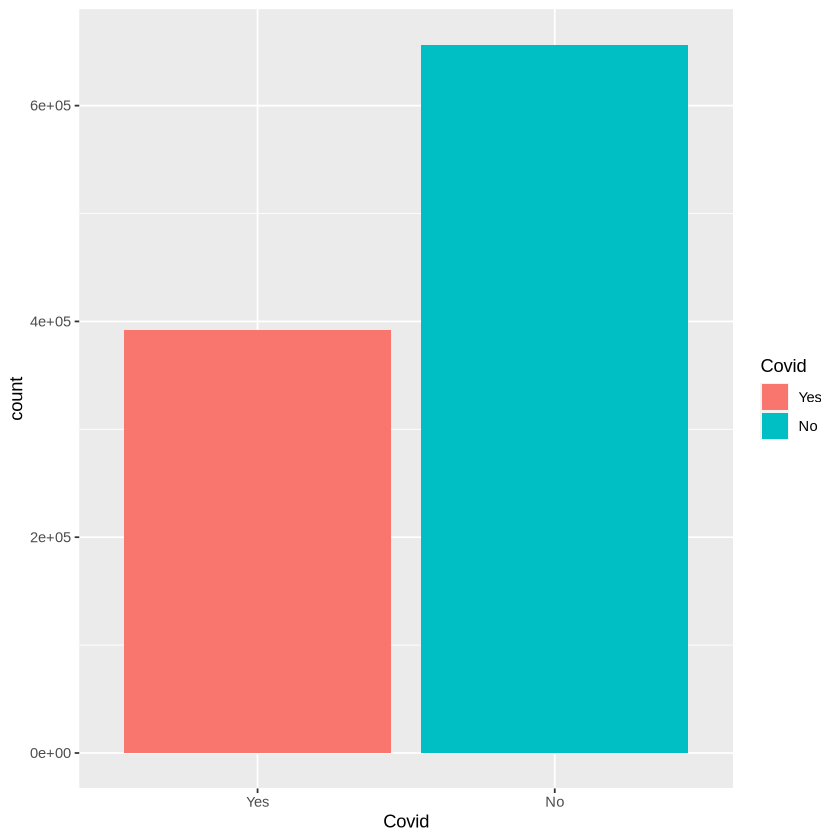

In [6]:
#plot showing covid vs non covid
covid_vs_noncovid <- ggplot(covid_data, aes(x=Covid, fill=Covid)) +
                geom_bar() 


#increase plot size
#add labs
#add interpretation in markdown cell afterwords

covid_vs_noncovid

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


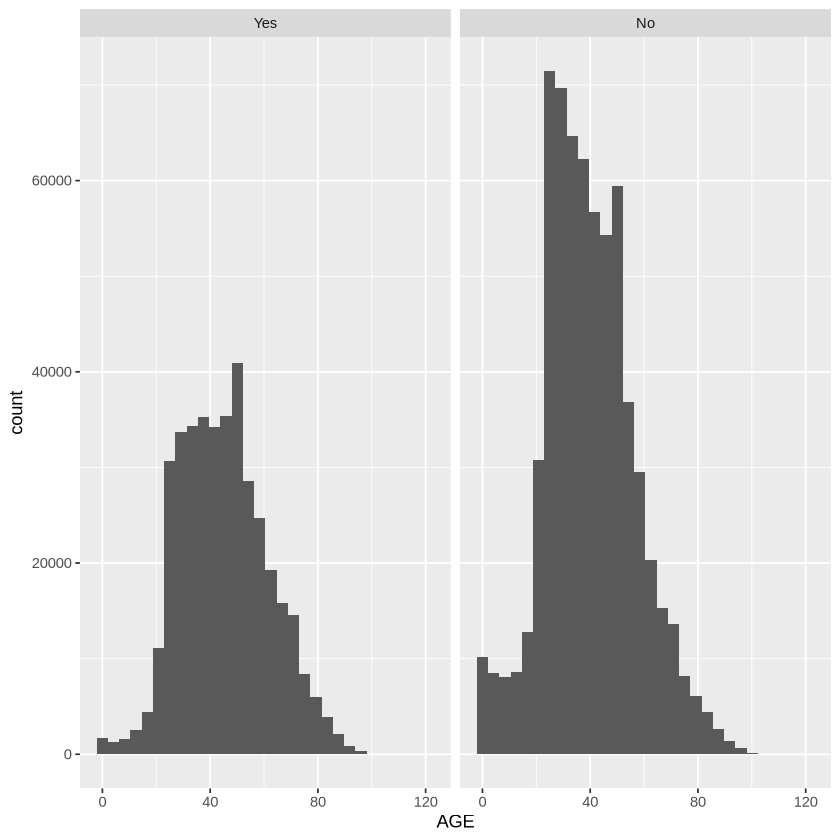

In [7]:
#Plot for Histogram by age for covid carriers and non covid

#increase plot size
#add labs
#add interpretation in markdown cell afterwords

covid_by_age <- ggplot(covid_data, aes(x=AGE)) +
                geom_histogram(position = "identity") +
                facet_grid(cols = vars(Covid))
covid_by_age

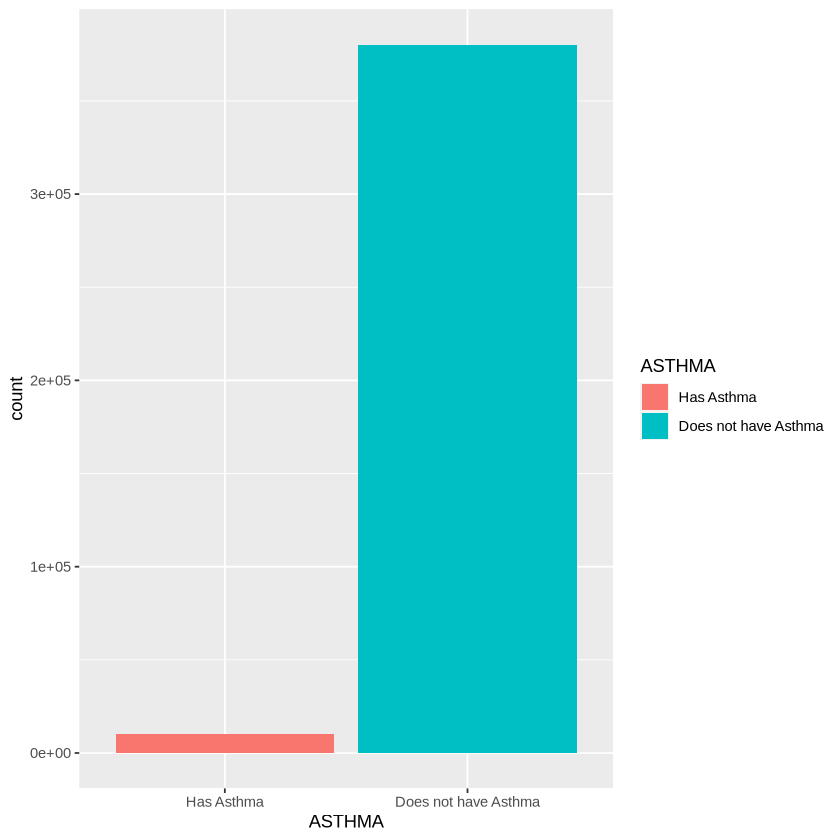

In [9]:
#plot for asthma in covid carriers (Scatter plot)
asthma_covid <- covid_data |>
                filter(Covid == "Yes") |>
                filter(ASTHMA <= 2) |>
                mutate(ASTHMA = as_factor(ASTHMA)) |>
                mutate(ASTHMA = fct_recode(ASTHMA, "Has Asthma" = "1", "Does not have Asthma" = "2")) |>
                ggplot(aes(x=ASTHMA, fill = ASTHMA)) + 
                # scale_x_continuous(labels = label_comma()) + 
                # scale_y_continuous(labels = label_comma()) +
                geom_bar()

asthma_covid

# Methods

explain the columns and the predictors we are choosing and why 
how data was cleaned 

# Expected Outcomes and Significance 

There is a variety of influences of a person that could be a stronger predictor towards Covid-19. The data selected focuses on age, sex, asthma, diabetes, cardiovascular disease, and obesity and what the expected outcomes of these aspects are that could help predict the possibility of someone having Covid. 
The increase of age causes a natural weakening of the body’s immune system, which would cause people to be more vulnerable to sickness. This allows the expectation of those who are older would be more likely to have covid compared to younger individuals. 
Based on lifestyle, behavioral and occupational risk factors, when it comes to sex, males could be expected to be more likely to contract Covid-19 compared to females. Additionally, factors such as hormones, genes, and anatomy can increase the risk of males to different diseases, in this case, Covid-19. 
Patients with underlying conditions such as diabetes, cardiovascular disease, and/or obesity would be considered a risk group for Covid-19, therefore it is expected that those factors would have a positive correlation with developing Covid-19. Compared to individuals without these underlying conditions, their health problems impair the patients’ body to effectively fight off infections or viruses. 
It might be expected that there could be a minimal correlation between those with asthma being more at risk of developing Covid-19. This is because asthma is a chronic lung disease that causes symptoms like coughing, shortness of breath, etc… The symptoms resemble that of Covid-19, however might not indicate an increased risk in developing the disease. However, those who have asthma would be at more danger if they do contract the disease, as it would worsen the pre-existing asthmatic symptoms. 
What impacts should this have: Analysis of the covid 19 data is significant as it would create a more reliable predictor and could be used to limit the spread of the virus as extra precautions would be made to protect those who are more susceptible. Additionally, it could provide a general understanding of what the disease could stem from since it establishes the risk groups, which could lead to exploration of the disease itself.

# Bibliography 

About covid-19. BC Centre for Disease Control. (n.d.). http://www.bccdc.ca/health-info/diseases-conditions/covid-19/about-covid-19#:~:text=COVID%2D19%20is%20a%20respiratory%20disease%20caused%20by%20the%20virus,a%20pandemic%20in%20March%202020.  